In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
from subprocess import check_output
from IPython.display import display, HTML
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataFest = pd.read_excel('combined.xlsx')

In [3]:
print('This dataset has ' + str(dataFest.shape[0]) + ' rows, and ' + str(dataFest.shape[1]) + ' columns')

This dataset has 319 rows, and 16 columns


In [4]:
dataFest.describe()
dataFest.head(7)

,Study ID,Patient ID,Sample_ID,Diagnosis_Age,Cancer_Type,Cancer_Type_Detailed,Disease_Free,Disease_Free_Status,Fraction_Genome_Altered,Mutation_Count,Oncotree_Code,Overall_Survival_Status,Sample_Type,Sex,Somatic_Status,TMB
0,gct_msk_2016,DS-test-001,DS-test-001-M2,24.8,Germ Cell Tumor,1,6.0,1.0,0.3627,NaN,NSGCT,0:LIVING,Metastasis,Male,Matched,0.066667
1,gct_msk_2016,DS-test-003,DS-test-003-P,58.3,Germ Cell Tumor,1,4.8,1.0,0.7426,NaN,NSGCT,0:LIVING,Metastasis,Male,Matched,0.333333
2,gct_msk_2016,DS-test-004,DS-test-004-M,29.5,Germ Cell Tumor,1,3.6,1.0,0.0311,NaN,NSGCT,1:DECEASED,Metastasis,Male,Matched,0.000000
3,gct_msk_2016,DS-test-007,DS-test-007-P,24.6,Germ Cell Tumor,1,3.6,1.0,0.0000,NaN,NSGCT,1:DECEASED,Primary,Male,Matched,0.133333
4,gct_msk_2016,DS-test-008,DS-test-008-M,20.8,Germ Cell Tumor,1,2.4,1.0,0.2215,NaN,NSGCT,1:DECEASED,Metastasis,Male,Matched,0.133333
5,gct_msk_2016,DS-test-012,DS-test-012-M2,19.5,Germ Cell Tumor,1,3.6,1.0,0.1417,NaN,NSGCT,1:DECEASED,Metastasis,Male,Matched,0.033333
6,gct_msk_2016,DS-test-013,DS-test-013-M,32.9,Germ Cell Tumor,1,188.4,1.0,0.6373,NaN,NSGCT,1:DECEASED,Metastasis,Male,Matched,0.333333


In [5]:
dataFest.describe()

,Diagnosis_Age,Disease_Free,Disease_Free_Status,Fraction_Genome_Altered,Mutation_Count,TMB
count,319.000000,286.000000,316.000000,319.000000,251.000000,318.000000
mean,32.306583,39.845385,0.443038,0.299387,32.366534,0.894235
std,9.703743,55.709021,0.497533,0.201609,37.095783,1.230275
min,14.000000,0.100000,0.000000,0.000000,1.000000,0.000000
25%,24.900000,6.000000,0.000000,0.130500,2.000000,0.033333
50%,31.000000,19.200000,0.000000,0.303500,38.000000,0.133333
75%,38.000000,44.990000,1.000000,0.470150,57.000000,1.800000
max,67.000000,399.600000,1.000000,0.867300,426.000000,14.533333


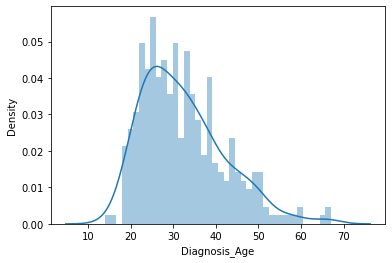

In [6]:
sns.distplot(dataFest.Diagnosis_Age.dropna(), kde=True, bins = 40);

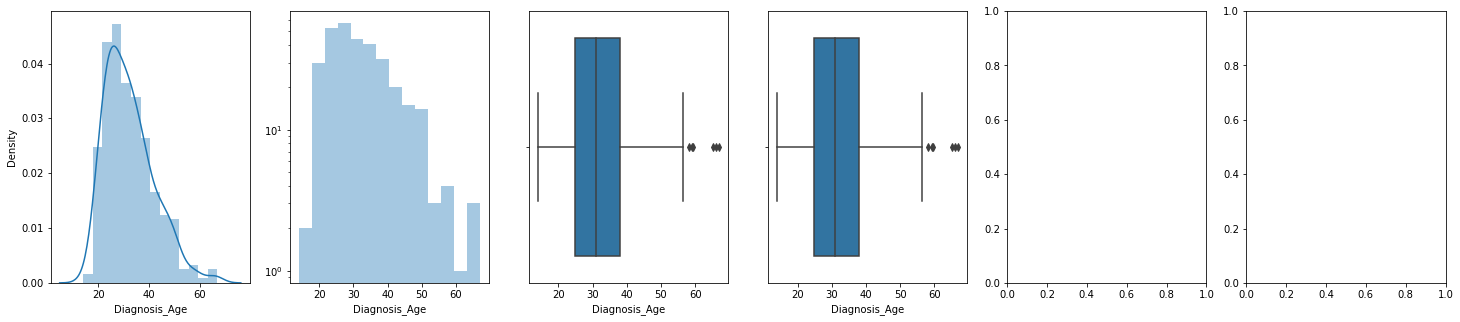

In [7]:
Diagnosis_Age, axs = plt.subplots(ncols = 6, figsize=(25, 5))

sns.distplot(dataFest.Diagnosis_Age.dropna(), kde=True, ax=axs[0])
second_plt = sns.distplot(dataFest.Diagnosis_Age.dropna()[dataFest.Diagnosis_Age > 1], kde=False, ax=axs[1])
sns.boxplot(dataFest.Diagnosis_Age, ax=axs[2], orient = 'v')
sns.boxplot(dataFest.Diagnosis_Age, ax=axs[3], orient = 'v', showfliers=True)

second_plt.set_yscale('log')

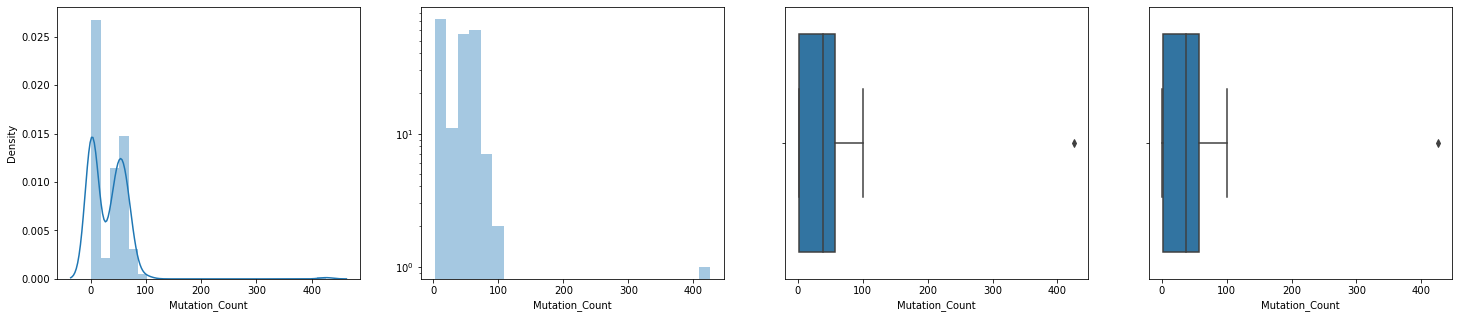

In [8]:
Mutation_Count, axs = plt.subplots(ncols = 4, figsize=(25, 5))

sns.distplot(dataFest.Mutation_Count.dropna(), kde=True, ax=axs[0])
second_plt = sns.distplot(dataFest.Mutation_Count.dropna()[dataFest.Mutation_Count > 1], kde=False, ax=axs[1])
sns.boxplot(dataFest.Mutation_Count, ax=axs[2], orient = 'v')
sns.boxplot(dataFest.Mutation_Count, ax=axs[3], orient = 'v', showfliers=True)

second_plt.set_yscale('log')

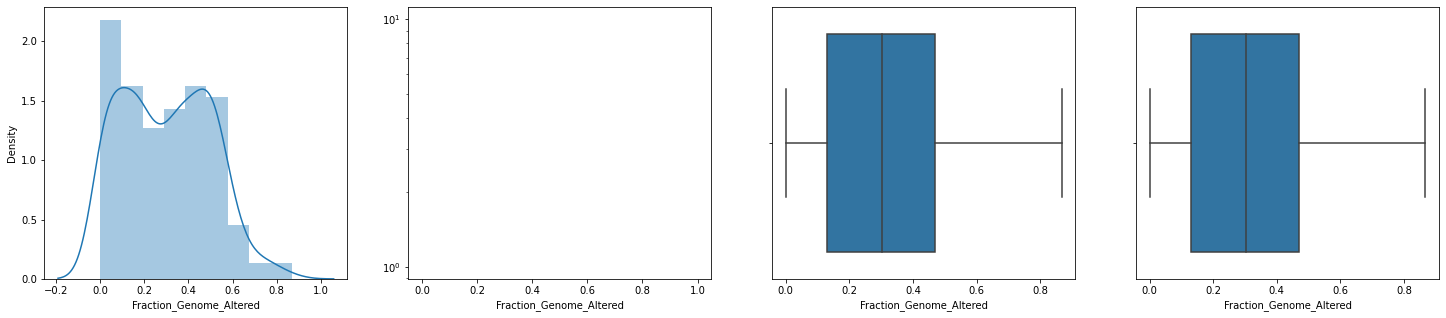

In [9]:
Fraction_Genome_Altered, axs = plt.subplots(ncols = 4, figsize=(25, 5))

sns.distplot(dataFest.Fraction_Genome_Altered.dropna(), kde=True, ax=axs[0])
second_plt = sns.distplot(dataFest.Fraction_Genome_Altered.dropna()[dataFest.Fraction_Genome_Altered > 1], kde=False, ax=axs[1])
sns.boxplot(dataFest.Fraction_Genome_Altered, ax=axs[2], orient = 'v')
sns.boxplot(dataFest.Fraction_Genome_Altered, ax=axs[3], orient = 'v', showfliers=False)

second_plt.set_yscale('log')

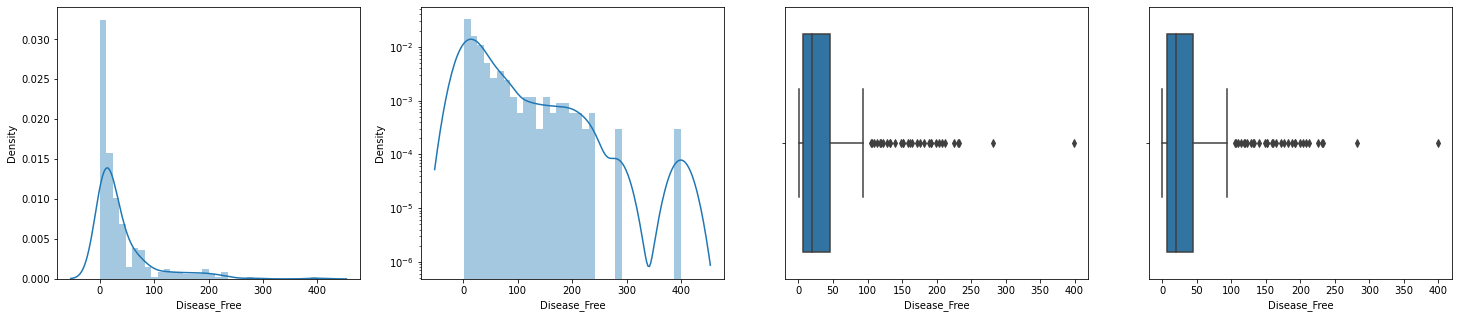

In [10]:
Disease_Free, axs = plt.subplots(ncols = 4, figsize=(25, 5))

sns.distplot(dataFest.Disease_Free.dropna(), kde=True, ax=axs[0])
second_plt = sns.distplot(dataFest.Disease_Free.dropna()[dataFest.Disease_Free> 1], kde=True, ax=axs[1])
sns.boxplot(dataFest.Disease_Free, ax=axs[2], orient = 'v')
sns.boxplot(dataFest.Disease_Free, ax=axs[3], orient = 'v', showfliers=True)

second_plt.set_yscale('log')

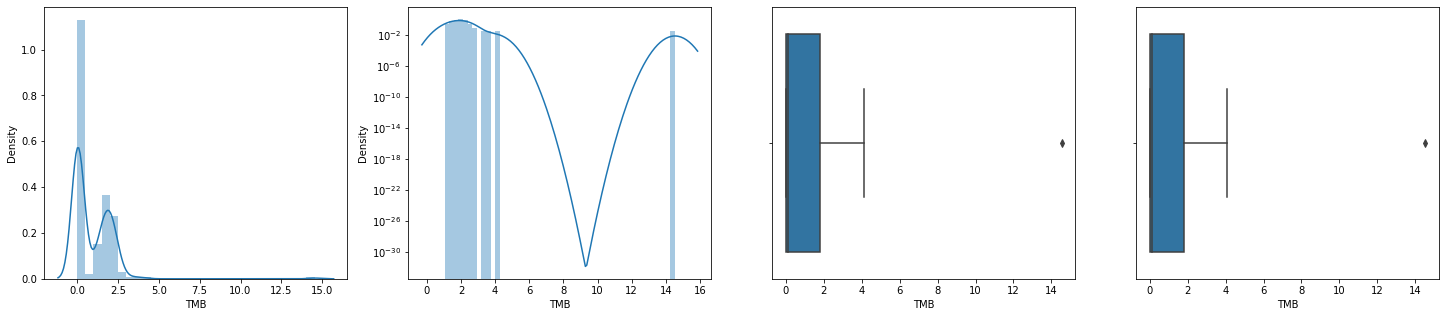

In [11]:
TMB, axs = plt.subplots(ncols = 4, figsize=(25, 5))

sns.distplot(dataFest.TMB.dropna(), kde=True, ax=axs[0])
second_plt = sns.distplot(dataFest.TMB.dropna()[dataFest.TMB> 1], kde=True, ax=axs[1])
sns.boxplot(dataFest.TMB, ax=axs[2], orient = 'v')
sns.boxplot(dataFest.TMB, ax=axs[3], orient = 'v', showfliers=True)

second_plt.set_yscale('log')

# Bivariate analysis


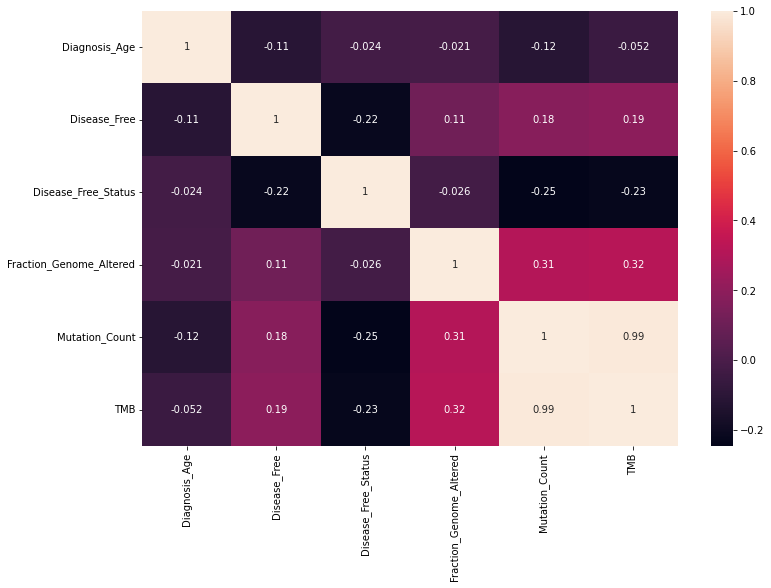

In [12]:
plt.figure(figsize=(12, 8))

vg_corr = dataFest.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values,
            annot = True);

<Figure size 1008x1008 with 0 Axes>

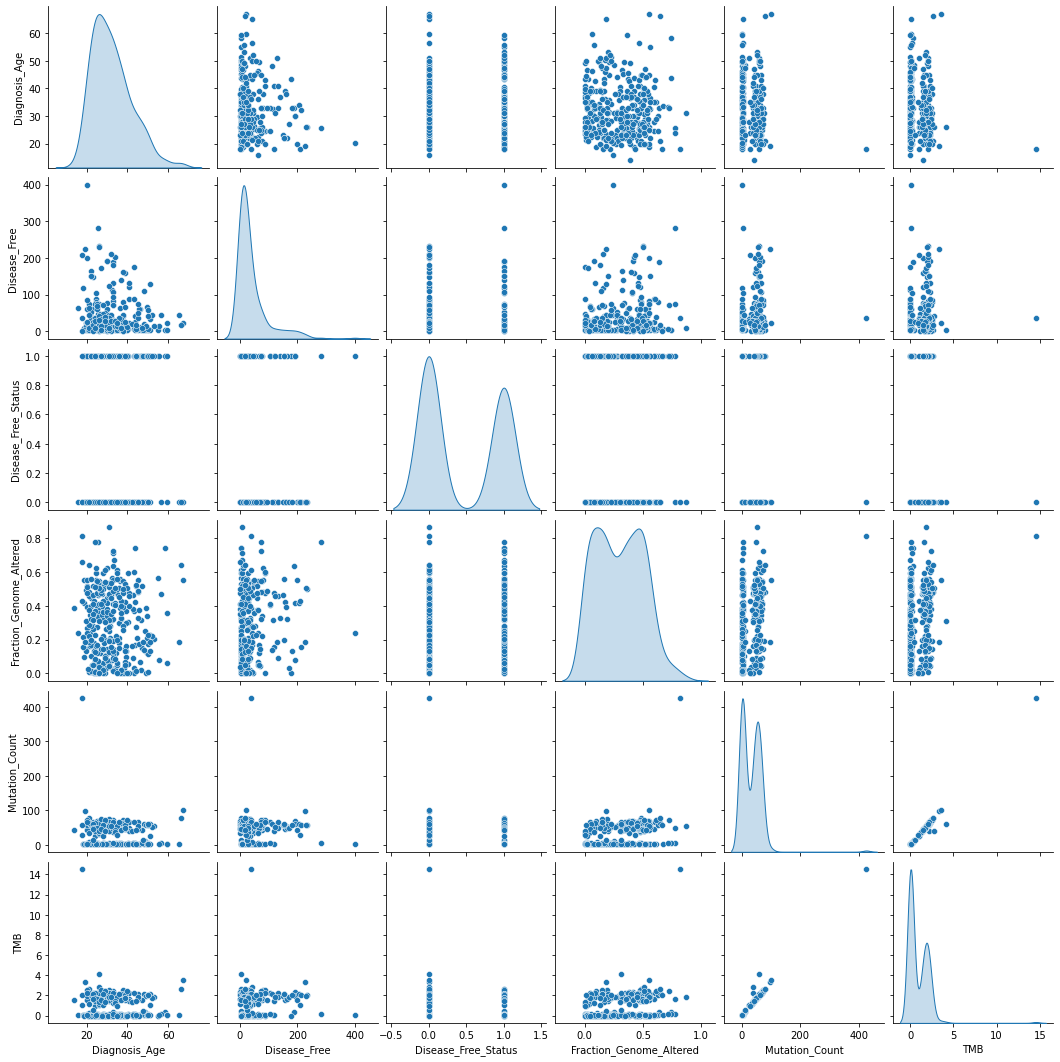

In [13]:
plt.figure(figsize=(14, 14))

sns.pairplot(dataFest, diag_kind='kde');

In [14]:
dataFest = dataFest.dropna(axis=0)

In [15]:
y = dataFest.Diagnosis_Age

In [16]:
dataFest_Features = ['Disease_Free','Disease_Free_Status','Fraction_Genome_Altered','Mutation_Count','TMB']

In [17]:
X = dataFest[dataFest_Features]

In [18]:
from sklearn.tree import DecisionTreeRegressor
first_model = DecisionTreeRegressor(random_state=1)

In [19]:
import warnings

warnings.filterwarnings('ignore')


In [20]:
first_model.fit(X,y) 

DecisionTreeRegressor(random_state=1)

In [61]:
print("Making predictions for the following 6 cases:")
print(X.head(6))
print("The predictions are")
print(first_model.predict(X.head()))

Making predictions for the following 6 cases:
    Disease_Free  Disease_Free_Status  Fraction_Genome_Altered  \
17          18.0                  1.0                   0.0298   
18          20.4                  0.0                   0.5180   
20           7.2                  1.0                   0.6689   
23          75.6                  1.0                   0.5483   
27           4.8                  1.0                   0.6110   
28           6.0                  1.0                   0.3615   

    Mutation_Count       TMB  
17             4.0  0.133333  
18             3.0  0.100000  
20             1.0  0.033333  
23             1.0  0.033333  
27             2.0  0.066667  
28             2.0  0.066667  
The predictions are
[43.2 28.8 33.5 25.9 34.9]


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [23]:
X_train.shape, X_test.shape

((156, 5), (77, 5))

In [24]:
X_train.dtypes

Disease_Free               float64
Disease_Free_Status        float64
Fraction_Genome_Altered    float64
Mutation_Count             float64
TMB                        float64
dtype: object

In [25]:
X_train.head()

,Disease_Free,Disease_Free_Status,Fraction_Genome_Altered,Mutation_Count,TMB
115,61.20,0.0,0.0512,4.0,0.133333
211,72.04,1.0,0.7252,73.0,2.433333
282,39.98,0.0,0.6116,72.0,2.433333
221,148.72,0.0,0.4671,58.0,1.933333
62,16.80,0.0,0.3882,1.0,0.033333


In [28]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Disease_Free', 'Disease_Free_Status', 'Fraction_Genome_Altered', 'Mutation_Count', 'TMB'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [29]:
X_train.head()

,Disease_Free,Disease_Free_Status,Fraction_Genome_Altered,Mutation_Count,TMB
115,1,1,1,1,1
211,2,2,2,2,2
282,3,1,3,3,2
221,4,1,4,4,3
62,5,1,5,5,4


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

In [36]:
y_train.head()

115    22.5
211    33.0
282    29.0
221    23.0
62     36.5
Name: Diagnosis_Age, dtype: float64

In [49]:
rencoder = ce.OrdinalEncoder(cols=['Diagnosis_Age'])
y_train = rencoder.fit_transform(y_train)


In [50]:
y_train.dtypes

Diagnosis_Age    int64
dtype: object

In [52]:
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [53]:
y_pred = rfc.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

result = sqrt(mean_squared_error(X_train,y_pred))
print("RMSE:", result)

ValueError: Found input variables with inconsistent numbers of samples: [156, 77]